In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\Bayan Ali\anaconda3\envs\new_env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Bayan Ali\anaconda3\envs\new_env\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Bayan Ali\anaconda3\envs\new_env\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
pip install kneed


In [3]:
from sklearn import preprocessing

In [4]:
from sklearn.cluster import KMeans

In [5]:
pip install sklearn

In [6]:
from kneed import KneeLocator
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import GridSearchCV

In [7]:
#read the data that contains alpha values of both methods prusner and KS
cluster_pd = pd.read_csv("C:/Users/Bayan Ali/Desktop/SpotTheBot/Clustering.csv")

In [10]:
x_cluster = cluster_pd[["xmin based on data collapse","alpha based on data collapse","xmin based on KS","alpha based on KS"]]

In [11]:
len(x_cluster )

52

In [12]:
list_of_columns = [["xmin based on data collapse","alpha based on data collapse","xmin based on KS","alpha based on KS"], ["alpha based on data collapse", "alpha based on KS"],[ "alpha based on KS"],["alpha based on data collapse"]]
list_of_save = ["4cols", "2cols", "KS","DC"]
list_of_title_kmeans = ["K-means for 4 features","K-means for 2 features ","K-means for 1 feature KS ","K-means for 1 feature Prussner"]
list_of_title_wishart = ["Wishart for 4 features ","Wishart for 2 features ","Wishart for 1 feature KS","Wishart for 1 feature Prussner"]
list_of_xlabel = ["xmin: Prussner","τ: Prussner","τ: KS","τ: Prussner"]
list_of_ylabel =["τ: Prussner","τ: KS","τ: KS","τ: Prussner"]

# K-means

In [13]:
#the beat hyperparameters after grid Search
kmeans_kwargs = {
'algorithm': 'auto', 'init': 'k-means++', 'max_iter': 100, 'n_init': 5, 'random_state': 42, 'tol': 0.0001}

In [17]:
# One time :)
# Find best hyperparameters
# Define the parameter grid
param_grid = {
    'init': ['k-means++', 'random'],
    'n_init': [5, 10, 15],
    'max_iter': [100, 200, 300, 400, 500],
    'tol': [0.0001, 0.001, 0.01],
    'algorithm': ['auto', 'full', 'elkan'],
    'random_state': [0, 42, 100]
}
# Perform grid search
def Grid_search(data):
    kmeans = KMeans()
    grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1)
    grid_search.fit(data)
    # Print the best hyperparameters
    print("Best hyperparameters: ", grid_search.best_params_)
    #print('Optimal number of clusters based on parameter grid: ' + str(grid_search.best_params_['n_clusters']))
    return grid_search.best_params_






In [14]:
def Kmeans(data):
   # A list holds the SSE values for each k
    sse=[]
    silhouette_coefficients = [] #contains the score and class number
    db_index_coefficients =[]
    ch_index_coefficients =[]
    score_sil = []
    score_db_index = []
    score_ch_index = []
    max = 0
    for k in range(2, 15):
        kmeans = KMeans(n_clusters=k, init=kmeans_kwargs['init'], 
        max_iter=kmeans_kwargs['max_iter'], 
        tol=kmeans_kwargs['tol'], 
        algorithm=kmeans_kwargs['algorithm'], 
        random_state= kmeans_kwargs['random_state']
        )
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        cluster_labels = kmeans.fit_predict(data)
        score_sil.append(silhouette_score(data, cluster_labels))
        silhouette_coefficients.append((score_sil[-1], k))
       
        score_db_index.append(davies_bouldin_score(data, cluster_labels))
        db_index_coefficients.append((score_db_index[-1], k))
        score_ch_index.append(calinski_harabasz_score(data, cluster_labels))
        ch_index_coefficients.append((score_ch_index[-1], k))
        if max <  score_ch_index[-1]:
            max = score_ch_index[-1]
            label = cluster_labels
            best_num_cluster  = k
            

    #kl = KneeLocator(range(2, len(data)+1), sse, curve="convex", direction="decreasing")
    return sse, best_num_cluster,silhouette_coefficients, score_sil, db_index_coefficients, score_db_index,  ch_index_coefficients,score_ch_index, label

In [15]:
def plot(silhouette_coefficients,silhouette_scores,sse, name_dir):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    color = 'tab:red'
    ax1.set_xlabel("Number of Clusters")
    ax1.set_ylabel('SSE', color=color)
    ax1.plot(range(2, 11), sse, label = "SSE", color = "red", marker="*", linewidth = 1)
    ax1.tick_params(axis='y', labelcolor=color)
    plt.grid(linestyle='-')
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Coefficient Silhouette', color=color)  # we already handled the x-label with ax1
    ax2.plot(range(2,11), silhouette_scores, label = "Coefficient Silhouette", color = "blue", marker = "D", linewidth = 1)
    ax2.tick_params(axis='y', labelcolor=color)
    plt.axvline(max(silhouette_coefficients)[1], linestyle='--', color='black', dashes=(5, 5), linewidth=2)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.xticks(range(2,11))
    plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/K_means/best_cluster'+name_dir+'.png')
    plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/K_means/best_cluster'+name_dir+'.svg')
    plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/K_means/best_cluster'+name_dir+'.eps')
    plt.show()

In [26]:
def Kmeans_plot_metrics(score_sil, score_db_index,score_ch_index, name_dir):
        # Convert lists to numpy arrays for easier manipulation
        range_n_clusters = range(2, 15)
        score_sil = np.array(score_sil)
        score_db_index = np.array(score_db_index)
        score_ch_index = np.array(score_ch_index)
        n_clusters = np.array(list(range_n_clusters))

        # Create a 3D plot
        fig = plt.figure(figsize=(12, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Plot the metrics
        sc = ax.scatter(n_clusters, score_sil, score_db_index, c=score_ch_index, cmap='cividis',marker='*', s= 110)#cmap='viridis', cividis
        cb = plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
        cb.set_label('Calinski-Harabasz Index', fontsize=13, fontweight='bold', fontname='Times New Roman')

        # Set labels
        ax.set_xlabel('No. Clusters', fontsize=13, fontweight='bold', fontname='Times New Roman')
        ax.set_ylabel('Silhouette Score', fontsize=13, fontweight='bold', fontname='Times New Roman')
        ax.set_zlabel('Davies-Bouldin Index', fontsize=13, fontweight='bold', fontname='Times New Roman')
        ax.set_title('3D Plot of Clustering Metrics', fontsize=16, fontweight='bold', fontname='Times New Roman')
        plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/K_means/clusters_metrics'+ name_dir +'.svg')
        plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/K_means/clusters_metrics'+ name_dir +'.png')
        plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/K_means/clusters_metrics'+ name_dir +'.eps')
        plt.show()

   

In [27]:
def Kmeans_Wishart_alg_plot(data,name_dir,xlabel,ylabel, title, algo, label):

    plt.figure(figsize=(7, 6))
    plt.rcParams["axes.edgecolor"] = "black"
    # Set the background color of the plot
    plt.gca().set_facecolor('ghostwhite')
    #Getting the Centroids    
    u_labels = np.unique(label)
    if name_dir =='DC' or name_dir == 'KS':
        #if algo == "K_means":
        #    for i in u_labels:
                #plt.scatter(data[label == i][0].values , data[label == i][0].values, label = i+1, s = 100, marker='*',cmap = 'cividis')
        #else:
            for i in u_labels:
                plt.scatter(data[label == i][0].values , data[label == i][0].values, label = i, s = 100, marker='*',cmap = 'cividis') 
    else:
        #print(name_dir)
        #if algo == "Kmeans":
        #    for i in u_labels:
        #        plt.scatter(data[label == i][0].values , data[label == i][1].values, label = i+1, s = 100, marker='*', cmap = 'cividis')
       # else:
           # print(name_dir)
            for i in u_labels:
                plt.scatter(data[label == i][0].values , data[label == i][1].values, label = i, s = 100, marker='*',cmap = 'cividis')

    #plt.legend(frameon=True)
    plt.legend(frameon=True, loc='upper center', bbox_to_anchor=(0.5, -0.09), ncol=5)
    #plt.grid(True, linestyle='-',linewidth = 1, color = "darkgray", axis = 'y')
    plt.grid(True, linestyle='-',linewidth = 1, color = "darkgray")


    plt.xlabel(xlabel, fontsize=13, fontweight='bold', fontname='Times New Roman')
    plt.ylabel(ylabel, fontsize=13, fontweight='bold', fontname='Times New Roman')
    
    plt.title(title, fontsize=16, fontweight='bold', fontname='Times New Roman')
    plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/'+algo+'/cluster'+ name_dir +'.svg')
    plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/'+algo+'/clusters'+ name_dir +'.png')
    plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/'+algo+'/clusters'+ name_dir +'.eps')
   

    plt.show()


In [28]:
def save_result_labels_to_csv(name_dir, label, alg):
    # TODO: Save the result labels to a CSV file
    result_cluster_pd = cluster_pd[['N','Languages']]
    result_cluster_pd['cluster'] = label
    result_cluster_pd.to_csv('C:/Users/Bayan Ali/Desktop/SpotTheBot/'+alg+'/cluster_num_'+name_dir+'.csv', index=False)

4cols xmin: Prussner τ: Prussner K-means for 4 features
['xmin based on data collapse', 'alpha based on data collapse', 'xmin based on KS', 'alpha based on KS']
14
[ 8 12  5 12  1  5 13  5  1  4  4  4  4  9  0  0  0  4  9  9  4  1  5  9
  5  9  9  0  4 11  4  5  5  9  9  4 11  2 11  2 11 10  9  5  9  7  1  9
  0  5  3  6]
13 13 13
Silhouette Score: 0.65  and  the best number of clusters for sil: 6
Davies-Bouldin Index: 0.27 and the best number of clusters for db: 7 
Calinski-Harabasz Index: 315.76 and the best number of clusters for ch: 14
[(44.84614842943301, 2), (56.83646819339105, 3), (72.17930635546922, 4), (91.82227033674407, 5), (114.05274282455105, 6), (120.37454834148647, 7), (134.795430913972, 8), (161.76274434649864, 9), (182.4903101614741, 10), (211.58566462509887, 11), (245.68882850488657, 12), (268.02908773857297, 13), (315.75582408506705, 14)]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


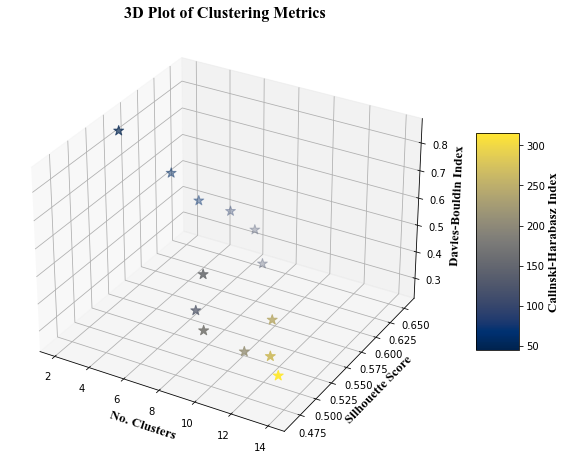

C:\Users\BAYANA~1\AppData\Local\Temp/ipykernel_11824/1240544572.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[label == i][0].values , data[label == i][1].values, label = i, s = 100, marker='*',cmap = 'cividis')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


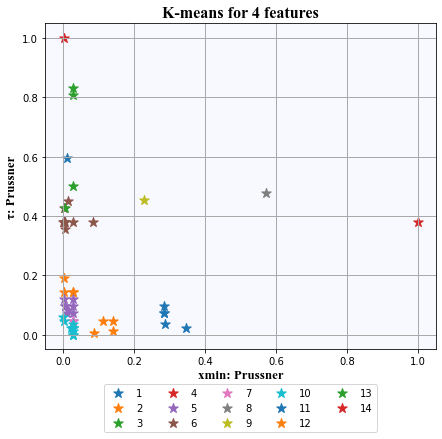

C:\Users\BAYANA~1\AppData\Local\Temp/ipykernel_11824/2736090771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_cluster_pd['cluster'] = label


2cols τ: Prussner τ: KS K-means for 2 features 
['alpha based on data collapse', 'alpha based on KS']
14
[ 6  6 13  6  8 13  7  0  8 11 11 11  9  5  9  1  9  1  9  5  1  8  0  5
 13  5  9  1 11  9 11  3  0  5  9  1  5 12  5  2  9 10  5  3  5  6  8  5
  1  0 13  4]
13 13 13
Silhouette Score: 0.77  and  the best number of clusters for sil: 4
Davies-Bouldin Index: 0.26 and the best number of clusters for db: 4 
Calinski-Harabasz Index: 772.28 and the best number of clusters for ch: 14
[(118.07823292769524, 2), (184.0760569995474, 3), (250.0384018384832, 4), (276.13208924421855, 5), (379.8153400229934, 6), (428.5156288083395, 7), (471.7028541866765, 8), (570.0162010186617, 9), (628.9578271542957, 10), (658.3851029422519, 11), (692.9441072998532, 12), (723.3972214544532, 13), (772.2793260641688, 14)]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


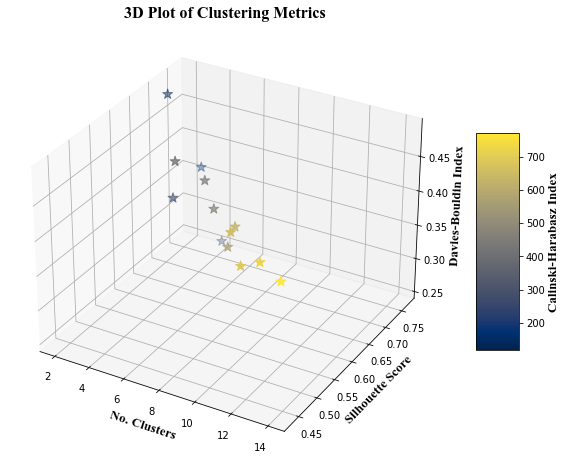

C:\Users\BAYANA~1\AppData\Local\Temp/ipykernel_11824/1240544572.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[label == i][0].values , data[label == i][1].values, label = i, s = 100, marker='*',cmap = 'cividis')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


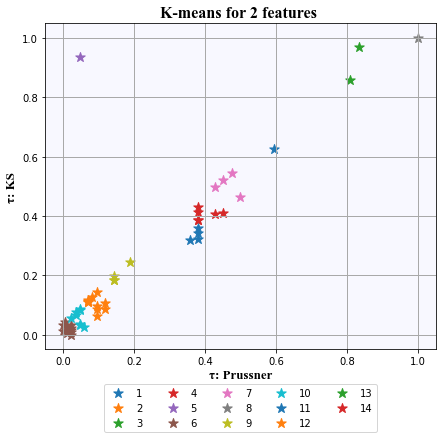

C:\Users\BAYANA~1\AppData\Local\Temp/ipykernel_11824/2736090771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_cluster_pd['cluster'] = label


KS τ: KS τ: KS K-means for 1 feature KS 
['alpha based on KS']
14
[11  6  2  6 10 13  3  9 10  0  7  0  0  5  0  7  0  7 12 12  7  4  9  5
 13  5 12  7  0 12  7  2 13  5  0  7 12  3  5  8  0  1 12  2 12 11 10 12
  7  9  2  3]
13 13 13
Silhouette Score: 0.76  and  the best number of clusters for sil: 3
Davies-Bouldin Index: 0.30 and the best number of clusters for db: 3 
Calinski-Harabasz Index: 1453.51 and the best number of clusters for ch: 14
[(118.20776341117056, 2), (343.7609240672532, 3), (370.56923921432184, 4), (506.0620206587355, 5), (612.9326924750534, 6), (688.2096825005231, 7), (757.9464847664336, 8), (892.492579515179, 9), (995.1475903045617, 10), (1147.55458326512, 11), (1183.3803425522644, 12), (1331.7677064413715, 13), (1453.5073085258632, 14)]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


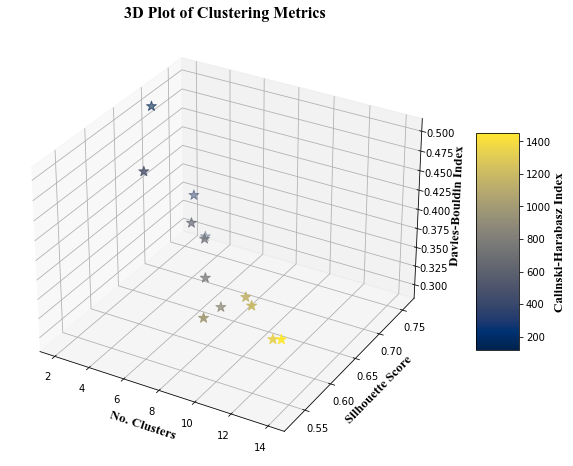

C:\Users\BAYANA~1\AppData\Local\Temp/ipykernel_11824/1240544572.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[label == i][0].values , data[label == i][0].values, label = i, s = 100, marker='*',cmap = 'cividis')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


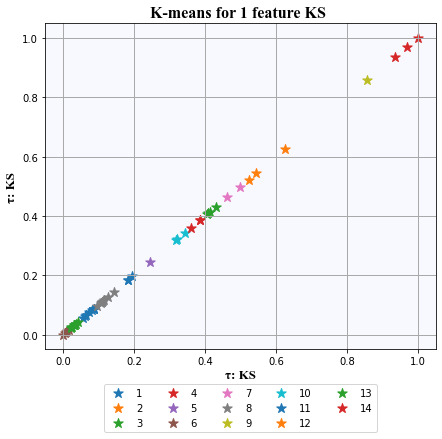

C:\Users\BAYANA~1\AppData\Local\Temp/ipykernel_11824/2736090771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_cluster_pd['cluster'] = label


DC τ: Prussner τ: Prussner K-means for 1 feature Prussner
['alpha based on data collapse']
14
[ 8  8  4  1 12  4  2  4 12  0 10 10 11  3  3 10  3  7 11 13  7  9  4 13
  4  3 11  7 10 11  0  8  4  3  3 10 13  5 13  5 11  6  3  8 13  1 12  3
  7  4  4 11]
13 13 13
Silhouette Score: 0.82  and  the best number of clusters for sil: 3
Davies-Bouldin Index: 0.24 and the best number of clusters for db: 14 
Calinski-Harabasz Index: 3940.26 and the best number of clusters for ch: 14
[(166.00044931061873, 2), (442.9486180962416, 3), (449.3373307595765, 4), (537.4793899368083, 5), (637.8936648142366, 6), (811.4936953121992, 7), (1210.1577954173504, 8), (1504.6135203966946, 9), (1863.4793517788921, 10), (2154.9731148344895, 11), (2884.2149730754436, 12), (3246.1396204743273, 13), (3940.2633344036058, 14)]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


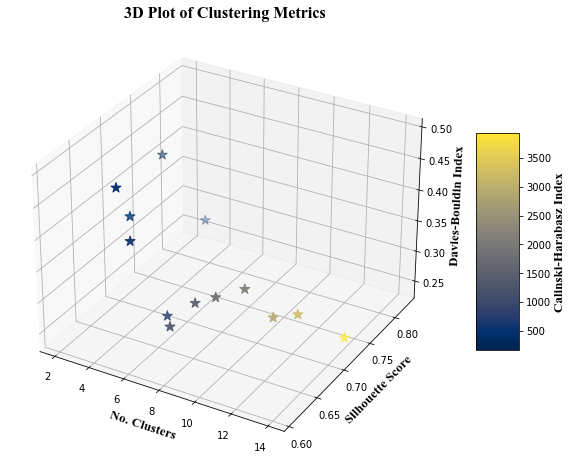

C:\Users\BAYANA~1\AppData\Local\Temp/ipykernel_11824/1240544572.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[label == i][0].values , data[label == i][0].values, label = i, s = 100, marker='*',cmap = 'cividis')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


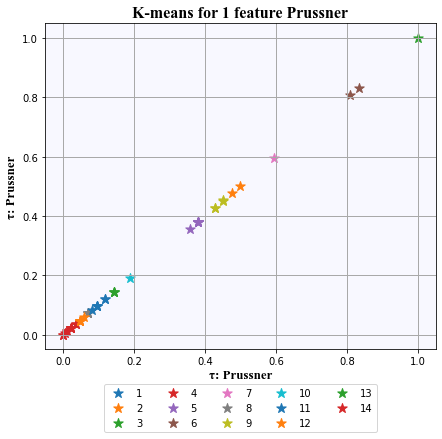

C:\Users\BAYANA~1\AppData\Local\Temp/ipykernel_11824/2736090771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_cluster_pd['cluster'] = label


In [29]:
for item, name_dir, xlabel, ylabel, title in zip(list_of_columns, list_of_save, list_of_xlabel, list_of_ylabel, list_of_title_kmeans):
    print(name_dir, xlabel, ylabel, title)
    x_cluster = cluster_pd[item]
    scaler = preprocessing.MinMaxScaler()
    x_scaled_cluster_data = scaler.fit_transform(x_cluster)
    X_train_cluster = pd.DataFrame(x_scaled_cluster_data)
    #print(">>>> Start Grid Search to find the best hyperparameters.....") Done
    #best_parameters = Grid_search(X_train_cluster) Done
    sse, best_num_cluster,silhouette_coefficients, score_sil, db_index_coefficients, score_db_index,  ch_index_coefficients,score_ch_index, label= Kmeans(X_train_cluster)
    
    print(item)
    print(best_num_cluster)
    print(label)
    print(len(sse), len(score_sil), len(silhouette_coefficients))
    # Print the metric scores
    best_cluster_value_sil =  max(silhouette_coefficients, key=lambda x: x[0])
    best_cluster_value_db = min(db_index_coefficients, key=lambda x: x[0])
    best_cluster_value_ch =  max(ch_index_coefficients, key=lambda x: x[0])
    print(f"Silhouette Score: {max(score_sil):.2f}  and  the best number of clusters for sil: {best_cluster_value_sil[1]}")
    print(f"Davies-Bouldin Index: {min(score_db_index):.2f} and the best number of clusters for db: {best_cluster_value_db[1]} ")
    print(f"Calinski-Harabasz Index: {max(score_ch_index):.2f} and the best number of clusters for ch: {best_cluster_value_ch[1]}")
    print(ch_index_coefficients)
    #plot(silhouette_coefficients, score_sil,sse,name_dir)
    Kmeans_plot_metrics(score_sil,  score_db_index,score_ch_index, name_dir)
    Kmeans_Wishart_alg_plot(X_train_cluster, name_dir, xlabel,ylabel,title, "K_means", label+1)
    save_result_labels_to_csv(name_dir, label+1, "K_means")


# Wishart

In [31]:
%run Wishart.py

In [32]:
import numpy as np
from tqdm import notebook
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [34]:
def wishart_grid_search(data):
    n_sig_sil_db_ch_coefficients = []
    for sig, neighbour in zip(np.arange(0.01, 0.4, 0.01),range(1,50)) :
        #for neighbour in range(1,40):
            wishart = Wishart(significance_level = sig, wishart_neighbors = neighbour)
            predict= wishart.fit(data)
            max_cluster = np.max(predict)
            min_cluster = np.min(predict)

            clusters = [[] for i in range(max_cluster - min_cluster + 1)]
            for index, cluster in enumerate(predict):
                clusters[cluster - min_cluster].append(index)

            if len(clusters) == 1:
                #print("ignore" + str(neighbour))
                continue
            score_sil=silhouette_score(data, predict)
            score_db_index=davies_bouldin_score(data, predict)
            score_ch_index=calinski_harabasz_score(data, predict)
            #
            n_sig_sil_db_ch_coefficients.append((neighbour, sig,score_sil, score_db_index,score_ch_index, max_cluster))
        
            

            

    return  n_sig_sil_db_ch_coefficients

In [42]:
def Wishart_plot_metrics(n_sig_sil_db_ch_coefficients_list, name_dir):
    # Extracting data points
    neighbours = [x[0] for x in n_sig_sil_db_ch_coefficients_list]
    sigs = [x[1] for x in n_sig_sil_db_ch_coefficients_list]
    score_sils = [x[2] for x in n_sig_sil_db_ch_coefficients_list]
    score_db_indexes = [x[3] for x in n_sig_sil_db_ch_coefficients_list]
    score_ch_indexes = [x[4] for x in n_sig_sil_db_ch_coefficients_list]
    max_clusters = [x[5] for x in n_sig_sil_db_ch_coefficients_list]
    
    clusters = np.array(list(max_clusters))
    
    # Create a 3D plot for (neighbour, sig, score_sil, max_cluster)
    fig1 = plt.figure(figsize=(12, 8))
    ax1 = fig1.add_subplot(111, projection='3d')
    ax1.scatter(clusters, sigs,  neighbours, c=score_sils, cmap='cividis', marker='o',  s = 100)
    ax1.set_xlabel('No. Clusters', fontsize=13, fontweight='bold', fontname='Times New Roman')
    ax1.set_ylabel('Significance Level (sig)', fontsize=13, fontweight='bold', fontname='Times New Roman')
    ax1.set_zlabel('No. Neighbours', fontsize=13, fontweight='bold', fontname='Times New Roman')
    ax1.set_title('Silhouette Score', fontsize=16, fontweight='bold', fontname='Times New Roman')
    scatter1 = ax1.scatter(clusters, sigs,  neighbours, c= score_sils, cmap='cividis', marker='*')
    colorbar1 = plt.colorbar(scatter1)
    colorbar1.set_label('Silhouette Score', fontsize=13, fontweight='bold', fontname='Times New Roman')
    plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/Wishart/clusters_metrics_Silhouette_Score'+ name_dir +'.svg')
    plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/Wishart/clusters_metrics_Silhouette_Score'+ name_dir +'.png')
    plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/Wishart/clusters_metrics_Silhouette_Score'+ name_dir +'.eps')
    plt.show()
    # Create a 3D plot for (neighbour, sig, score_db_index, max_cluster)
    fig2 = plt.figure(figsize=(12, 8))
    ax2 = fig2.add_subplot(111, projection='3d')
    ax2.scatter(clusters, sigs,  neighbours, c=score_db_indexes, cmap='cividis', marker='*', s = 100)
    ax2.set_xlabel('No. Clusters', fontsize=13, fontweight='bold', fontname='Times New Roman')
    ax2.set_ylabel('Significance Level (sig)', fontsize=13, fontweight='bold', fontname='Times New Roman')
    ax2.set_zlabel('No. Neighbours', fontsize=13, fontweight='bold', fontname='Times New Roman')
    ax2.set_title('Davies-Bouldin Index', fontsize=16, fontweight='bold', fontname='Times New Roman')
    scatter2 = ax2.scatter(clusters, sigs,  neighbours, c= score_db_indexes, cmap='cividis', marker='*')
    colorbar2 = plt.colorbar(scatter2)
    colorbar2.set_label('Davies-Bouldin Index', fontsize=13, fontweight='bold', fontname='Times New Roman')
    plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/Wishart/clusters_metrics_DB_Index'+ name_dir +'.svg')
    plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/Wishart/clusters_metrics_DB_Index'+ name_dir +'.png')
    plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/Wishart/clusters_metrics_DB_Index'+ name_dir +'.eps')
    plt.show()
    # Create a 3D plot for (neighbour, sig, score_ch_index, max_cluster)
    fig3 = plt.figure(figsize=(12, 8))
    ax3 = fig3.add_subplot(111, projection='3d')
    ax3.scatter(clusters, sigs,  neighbours, c=score_ch_indexes, cmap='cividis', marker='s',s = 100)
    ax3.set_xlabel('No. Clusters', fontsize=13, fontweight='bold', fontname='Times New Roman')
    ax3.set_ylabel('Significance Level (sig)', fontsize=13, fontweight='bold', fontname='Times New Roman')
    ax3.set_zlabel('No. Neighbours ', fontsize=13, fontweight='bold', fontname='Times New Roman')
    ax3.set_title('Calinski-Harabasz Index ', fontsize=16, fontweight='bold', fontname='Times New Roman')
    scatter3 = ax3.scatter(clusters, sigs,  neighbours, c=score_ch_indexes, cmap='cividis', marker='*')
    colorbar3 = plt.colorbar(scatter3)
    colorbar3.set_label('Calinski-Harabasz Score', fontsize=13, fontweight='bold', fontname='Times New Roman')
    plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/Wishart/clusters_metrics_CH_Index'+ name_dir +'.svg')
    plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/Wishart/clusters_metrics_CH_Index'+ name_dir +'.png')
    plt.savefig('C:/Users/Bayan Ali/Desktop/SpotTheBot/Wishart/clusters_metrics_CH_Index'+ name_dir +'.eps')
    plt.show()

In [40]:
def Wishart_get_best_parameters(n_sig_sil_db_ch_coefficients_list):
    # Find the tuple with the maximum score_sil
    max_score_sil_tuple = max(n_sig_sil_db_ch_coefficients_list, key=lambda x: x[2])
    max_score_sil_value = max_score_sil_tuple[2]
    max_score_sil_index = n_sig_sil_db_ch_coefficients_list.index(max_score_sil_tuple)

    # Find the tuple with the minimum score_db_index
    min_score_db_index_tuple = min(n_sig_sil_db_ch_coefficients_list, key=lambda x: x[3])
    min_score_db_index_value = min_score_db_index_tuple[3]
    min_score_db_index_index = n_sig_sil_db_ch_coefficients_list.index(min_score_db_index_tuple)

    # Find the tuple with the maximum score_ch_index
    max_score_ch_index_tuple = max(n_sig_sil_db_ch_coefficients_list, key=lambda x: x[4])
    max_score_ch_index_value = max_score_ch_index_tuple[4]
    max_score_ch_index_index = n_sig_sil_db_ch_coefficients_list.index(max_score_ch_index_tuple)

    # Print the results
    print(f"Max Silhouette score: {max_score_sil_value}, Index: {max_score_sil_index}")
    print(n_sig_sil_db_ch_coefficients_list[max_score_sil_index])
    print(f"Min Davies-Bouldin score: {min_score_db_index_value}, Index: {min_score_db_index_index}")
    print(n_sig_sil_db_ch_coefficients_list[min_score_db_index_index])
    print(f"Max Calinski-Harabasz score: {max_score_ch_index_value}, Index: {max_score_ch_index_index}")
    print(n_sig_sil_db_ch_coefficients_list[max_score_ch_index_index])

    return min_score_db_index_index, max_score_sil_index, max_score_ch_index_index 


4cols xmin: Prussner τ: Prussner Wishart for 4 features 


Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering


Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


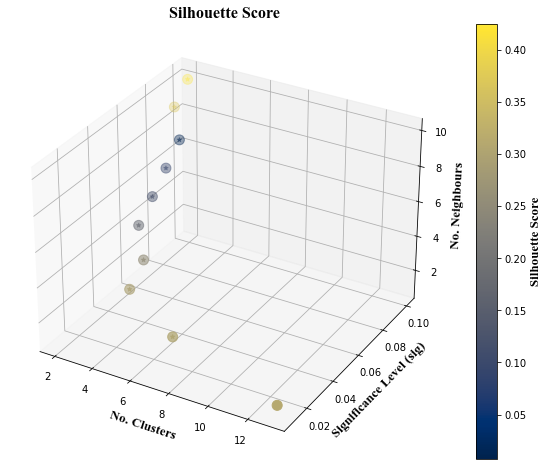

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


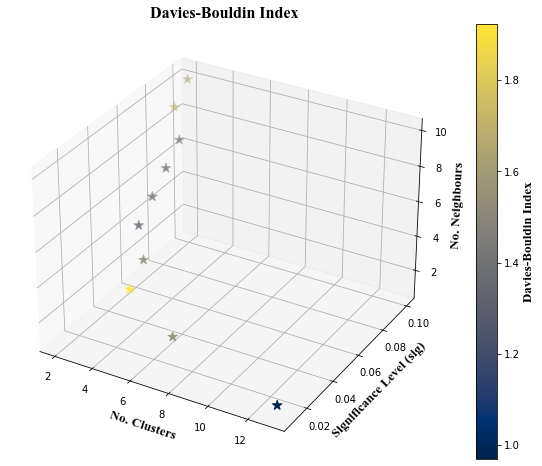

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


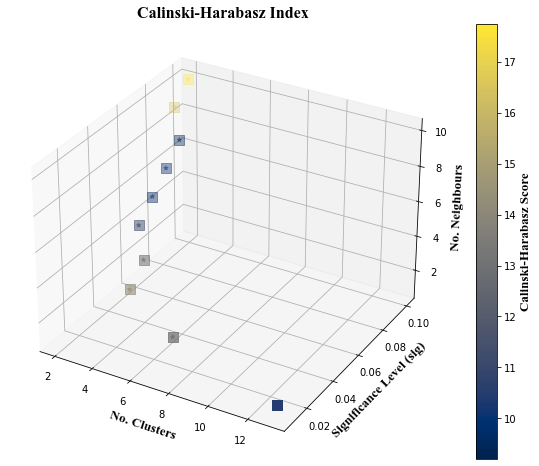

Max Silhouette score: 0.4249444301178188, Index: 9
(10, 0.09999999999999999, 0.4249444301178188, 1.628869819829335, 17.744048683518862, 2)
Min Davies-Bouldin score: 0.9697095244193016, Index: 0
(1, 0.01, 0.31185086633137793, 0.9697095244193016, 10.486889758550758, 13)
Max Calinski-Harabasz score: 17.744048683518862, Index: 9
(10, 0.09999999999999999, 0.4249444301178188, 1.628869819829335, 17.744048683518862, 2)
No. neighbours  1
Level of Significance  0.01
Start clustering


C:\Users\BAYANA~1\AppData\Local\Temp/ipykernel_11824/1240544572.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[label == i][0].values , data[label == i][1].values, label = i, s = 100, marker='*',cmap = 'cividis')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


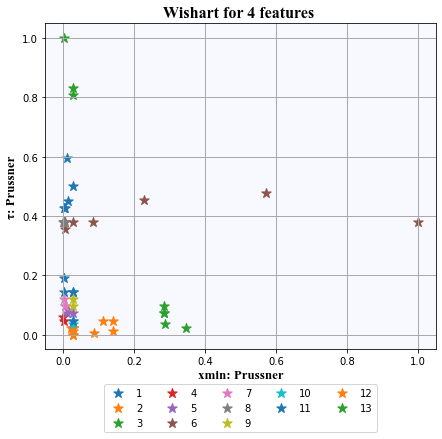

C:\Users\BAYANA~1\AppData\Local\Temp/ipykernel_11824/2736090771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_cluster_pd['cluster'] = label


2cols τ: Prussner τ: KS Wishart for 2 features 


Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


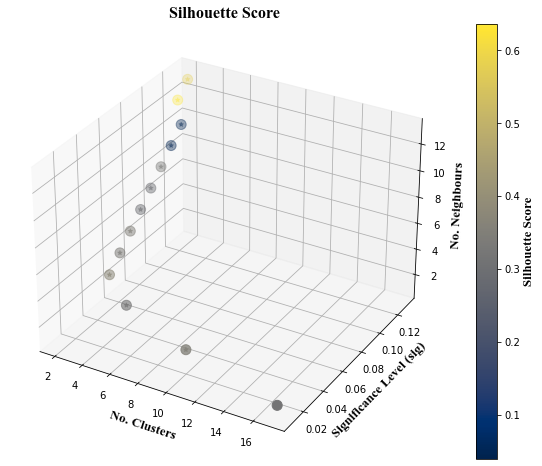

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


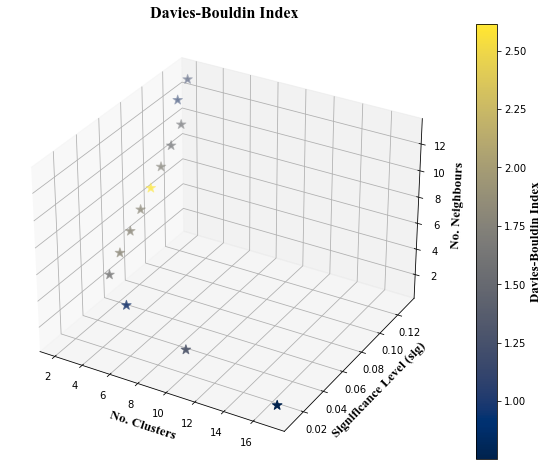

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


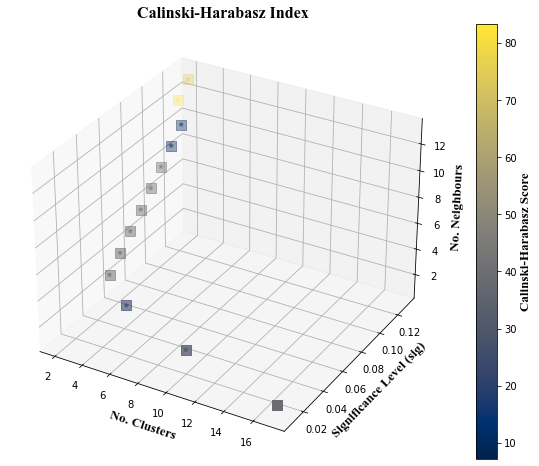

Max Silhouette score: 0.6364593918932523, Index: 11
(12, 0.12, 0.6364593918932523, 1.0686855683349459, 83.36922019793485, 2)
Min Davies-Bouldin score: 0.7535929535362628, Index: 0
(1, 0.01, 0.3162318048145218, 0.7535929535362628, 38.75222820437245, 17)
Max Calinski-Harabasz score: 83.36922019793485, Index: 11
(12, 0.12, 0.6364593918932523, 1.0686855683349459, 83.36922019793485, 2)
No. neighbours  1
Level of Significance  0.01
Start clustering


C:\Users\BAYANA~1\AppData\Local\Temp/ipykernel_11824/1240544572.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[label == i][0].values , data[label == i][1].values, label = i, s = 100, marker='*',cmap = 'cividis')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


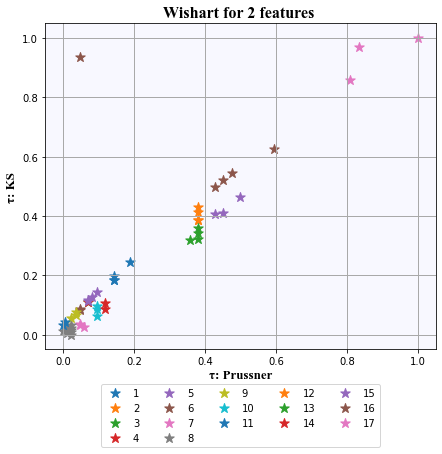

C:\Users\BAYANA~1\AppData\Local\Temp/ipykernel_11824/2736090771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_cluster_pd['cluster'] = label
c:\Users\Bayan Ali\Desktop\SpotTheBot\Wishart.py:57: RuntimeWarning: divide by zero encountered in power
  significan = np.power(my_clusters[:, 0], -dim) - np.power(my_clusters[:, 1], -dim)


KS τ: KS τ: KS Wishart for 1 feature KS


Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


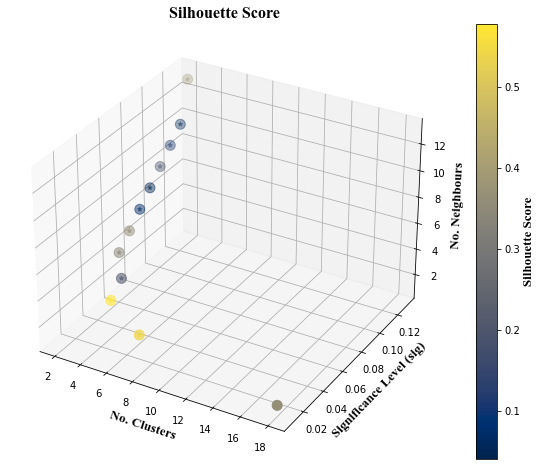

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


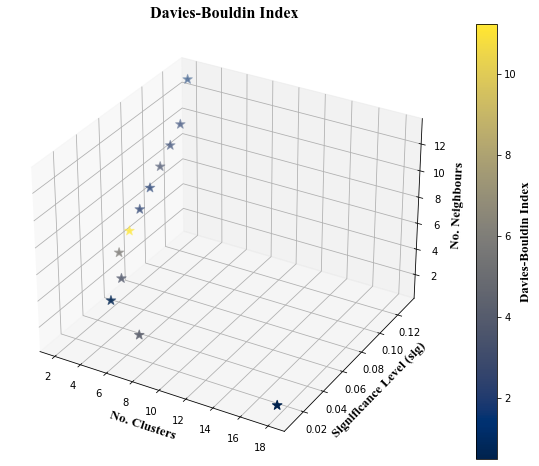

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


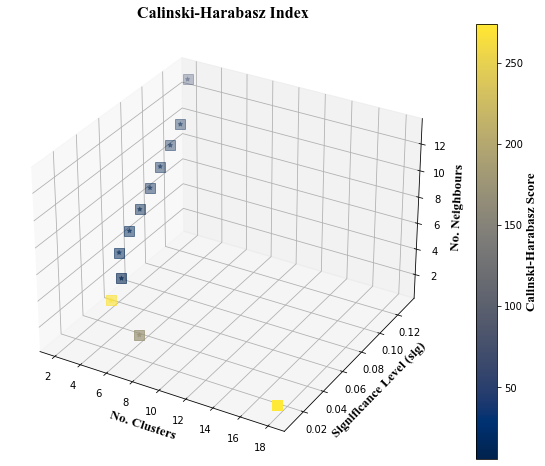

Max Silhouette score: 0.5780049011488154, Index: 2
(3, 0.03, 0.5780049011488154, 0.5824674069890549, 269.2213942331906, 4)
Min Davies-Bouldin score: 0.4907538717009422, Index: 0
(1, 0.01, 0.36323220452194527, 0.4907538717009422, 274.10912073745783, 18)
Max Calinski-Harabasz score: 274.10912073745783, Index: 0
(1, 0.01, 0.36323220452194527, 0.4907538717009422, 274.10912073745783, 18)
No. neighbours  1
Level of Significance  0.01
Start clustering


C:\Users\BAYANA~1\AppData\Local\Temp/ipykernel_11824/1240544572.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[label == i][0].values , data[label == i][0].values, label = i, s = 100, marker='*',cmap = 'cividis')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


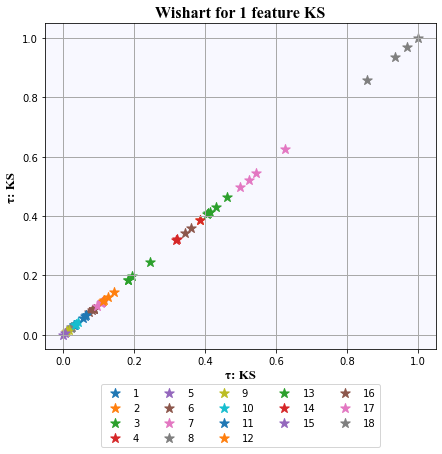

C:\Users\BAYANA~1\AppData\Local\Temp/ipykernel_11824/2736090771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_cluster_pd['cluster'] = label


DC τ: Prussner τ: Prussner Wishart for 1 feature Prussner


Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering


c:\Users\Bayan Ali\Desktop\SpotTheBot\Wishart.py:57: RuntimeWarning: divide by zero encountered in power
  significan = np.power(my_clusters[:, 0], -dim) - np.power(my_clusters[:, 1], -dim)
c:\Users\Bayan Ali\Desktop\SpotTheBot\Wishart.py:57: RuntimeWarning: invalid value encountered in subtract
  significan = np.power(my_clusters[:, 0], -dim) - np.power(my_clusters[:, 1], -dim)
c:\Users\Bayan Ali\Desktop\SpotTheBot\Wishart.py:57: RuntimeWarning: divide by zero encountered in power
  significan = np.power(my_clusters[:, 0], -dim) - np.power(my_clusters[:, 1], -dim)
c:\Users\Bayan Ali\Desktop\SpotTheBot\Wishart.py:57: RuntimeWarning: invalid value encountered in subtract
  significan = np.power(my_clusters[:, 0], -dim) - np.power(my_clusters[:, 1], -dim)
c:\Users\Bayan Ali\Desktop\SpotTheBot\Wishart.py:57: RuntimeWarning: divide by zero encountered in power
  significan = np.power(my_clusters[:, 0], -dim) - np.power(my_clusters[:, 1], -dim)
c:\Users\Bayan Ali\Desktop\SpotTheBot\Wishart.

Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering
Start clustering


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


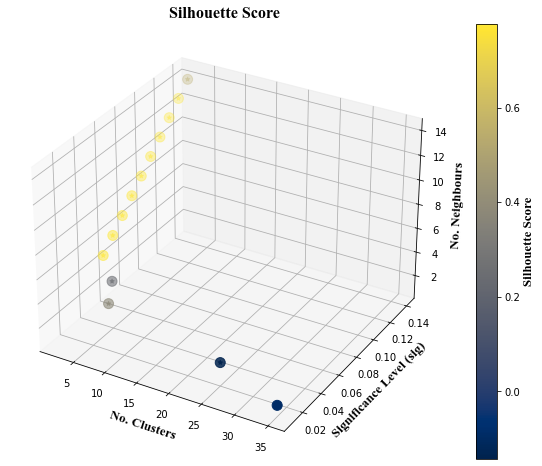

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


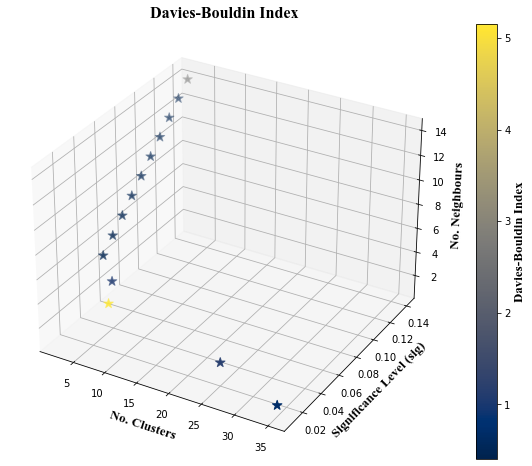

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


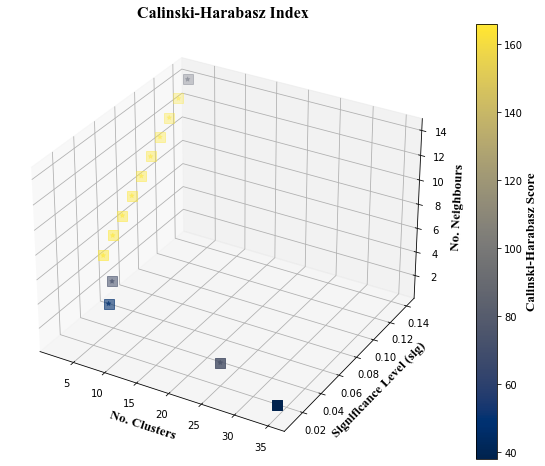

Max Silhouette score: 0.7771701469574013, Index: 4
(5, 0.05, 0.7771701469574013, 0.40395897946223885, 166.00044931061873, 2)
Min Davies-Bouldin score: 0.40395897946223885, Index: 4
(5, 0.05, 0.7771701469574013, 0.40395897946223885, 166.00044931061873, 2)
Max Calinski-Harabasz score: 166.00044931061873, Index: 4
(5, 0.05, 0.7771701469574013, 0.40395897946223885, 166.00044931061873, 2)
No. neighbours  5
Level of Significance  0.05
Start clustering


c:\Users\Bayan Ali\Desktop\SpotTheBot\Wishart.py:57: RuntimeWarning: divide by zero encountered in power
  significan = np.power(my_clusters[:, 0], -dim) - np.power(my_clusters[:, 1], -dim)
c:\Users\Bayan Ali\Desktop\SpotTheBot\Wishart.py:57: RuntimeWarning: invalid value encountered in subtract
  significan = np.power(my_clusters[:, 0], -dim) - np.power(my_clusters[:, 1], -dim)
C:\Users\BAYANA~1\AppData\Local\Temp/ipykernel_11824/1240544572.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[label == i][0].values , data[label == i][0].values, label = i, s = 100, marker='*',cmap = 'cividis')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


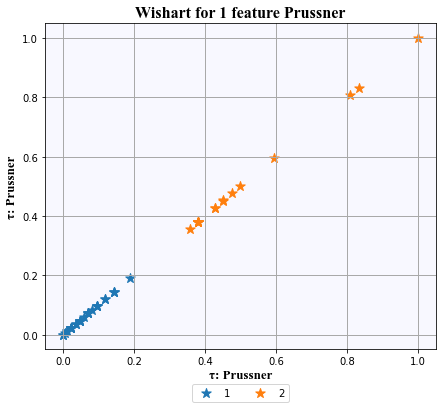

C:\Users\BAYANA~1\AppData\Local\Temp/ipykernel_11824/2736090771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result_cluster_pd['cluster'] = label


In [41]:
for item, name_dir, xlabel, ylabel, title in zip(list_of_columns, list_of_save, list_of_xlabel, list_of_ylabel, list_of_title_wishart):
    print(name_dir, xlabel, ylabel, title )
    print("\n")
    x_cluster = cluster_pd[item]
    scaler = preprocessing.MinMaxScaler()
    x_scaled_cluster_data = scaler.fit_transform(x_cluster)
    X_train_cluster = pd.DataFrame(x_scaled_cluster_data)


    n_sig_sil_db_ch_coefficients = wishart_grid_search( x_scaled_cluster_data )
    #print(">>>>>>> start for " + name_dir + ">>>>>>>>>>>>")
    #print(n_sig_sil_db_ch_coefficients)
    # plot metrics    
    Wishart_plot_metrics(n_sig_sil_db_ch_coefficients, name_dir)
    # Find the tuple with the maximum score_sil
    min_score_db_index_index, max_score_sil_index, max_score_ch_index_index = Wishart_get_best_parameters(n_sig_sil_db_ch_coefficients)
    n, sig,_,_,_,_ = n_sig_sil_db_ch_coefficients[min_score_db_index_index]
    print("No. neighbours ", n)
    print("Level of Significance ", sig)
    wishart = Wishart(significance_level = sig, wishart_neighbors = n)
    predict= wishart.fit(x_scaled_cluster_data)
    Kmeans_Wishart_alg_plot(X_train_cluster, name_dir, xlabel,ylabel,title,"Wishart", predict)
    save_result_labels_to_csv(name_dir, predict, "Wishart")

    
   

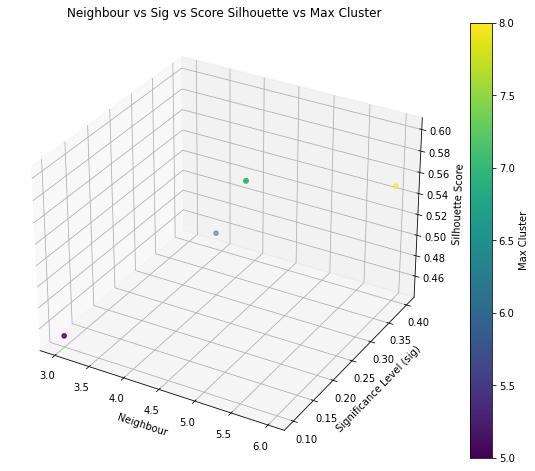

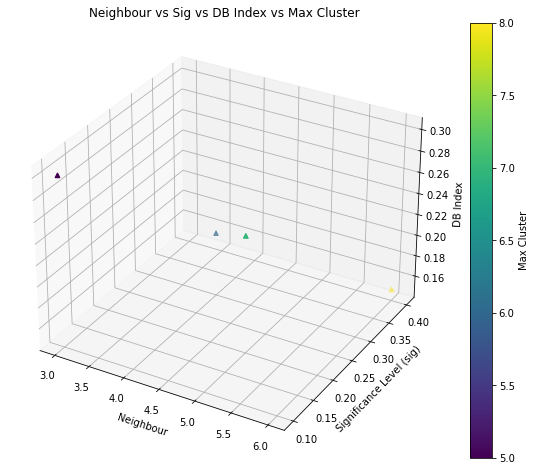

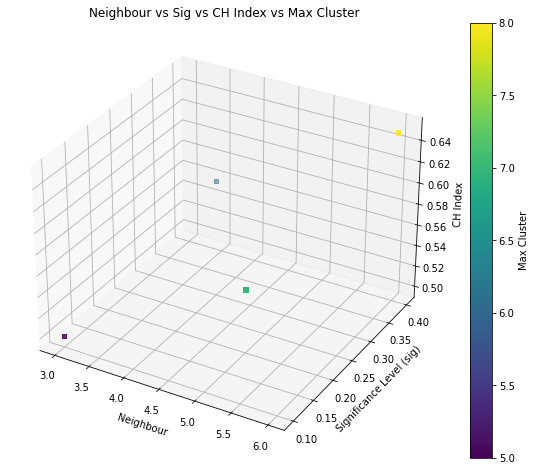

In [21]:
for item, name_dir, xlabel, ylabel, title in zip(list_of_columns, list_of_save, list_of_xlabel, list_of_ylabel, list_of_title_wishart):
    print(name_dir, xlabel, ylabel, title )
    print("\n")
    x_cluster = cluster_pd[item]
    scaler = preprocessing.MinMaxScaler()
    x_scaled_cluster_data = scaler.fit_transform(x_cluster)
    X_train_cluster = pd.DataFrame(x_scaled_cluster_data)
    # if name_dir =="4cols":
    #     neigh = 1
    # elif name_dir == "2cols":
    #     neigh = 2
    # elif name_dir == "DC":
    #     neigh = 4
    # else:
    #     neigh = 2

    n_sig_sil_db_ch_coefficients = wishart_grid_search( x_scaled_cluster_data )
    print(">>>>>>> start for " + name_dir + ">>>>>>>>>>>>")
    print(n_sig_sil_db_ch_coefficients)
    # Find the tuple with the maximum score_sil
    max_score_sil_tuple = max(n_sig_sil_db_ch_coefficients, key=lambda x: x[2])
    max_score_sil_value = max_score_sil_tuple[2]
    max_score_sil_index = n_sig_sil_db_ch_coefficients.index(max_score_sil_tuple)

    # Find the tuple with the minimum score_db_index
    min_score_db_index_tuple = min(n_sig_sil_db_ch_coefficients, key=lambda x: x[3])
    min_score_db_index_value = min_score_db_index_tuple[3]
    min_score_db_index_index = n_sig_sil_db_ch_coefficients.index(min_score_db_index_tuple)

    # Find the tuple with the maximum score_ch_index
    max_score_ch_index_tuple = max(n_sig_sil_db_ch_coefficients, key=lambda x: x[4])
    max_score_ch_index_value = max_score_ch_index_tuple[4]
    max_score_ch_index_index = n_sig_sil_db_ch_coefficients.index(max_score_ch_index_tuple)

    # Print the results
    print(f"Max score_sil value: {max_score_sil_value}, Index: {max_score_sil_index}")
    print(n_sig_sil_db_ch_coefficients[max_score_sil_index])
    print(f"Min score_db_index value: {min_score_db_index_value}, Index: {min_score_db_index_index}")
    print(n_sig_sil_db_ch_coefficients[min_score_db_index_index])
    print(f"Max score_ch_index value: {max_score_ch_index_value}, Index: {max_score_ch_index_index}")
    print(n_sig_sil_db_ch_coefficients[max_score_ch_index_index])
    
    Wishart_plot_metrics(n_sig_sil_db_ch_coefficients, name_dir)
    min_score_db_index_index, max_score_sil_index, max_score_ch_index_index = Wishart_get_best_parameters(n_sig_sil_db_ch_coefficients)



    # Extracting data points
    neighbours = [x[0] for x in n_sig_sil_db_ch_coefficients]
    sigs = [x[1] for x in n_sig_sil_db_ch_coefficients]
    score_sils = [x[2] for x in n_sig_sil_db_ch_coefficients]
    score_db_indexes = [x[3] for x in n_sig_sil_db_ch_coefficients]
    score_ch_indexes = [x[4] for x in n_sig_sil_db_ch_coefficients]
    max_clusters = [x[5] for x in n_sig_sil_db_ch_coefficients]
    
    clusters = np.array(list(max_clusters))
    
    # Create a 3D plot for (neighbour, sig, score_sil, max_cluster)
    fig1 = plt.figure(figsize=(10, 8))
    ax1 = fig1.add_subplot(111, projection='3d')
    ax1.scatter(clusters, sigs,  neighbours, c=score_sils, cmap='viridis', marker='o',  s = 100)
    ax1.set_xlabel(' Number of Clusters')
    ax1.set_ylabel('Significance Level (sig)')
    ax1.set_zlabel('Neighbour')
    ax1.set_title('Neighbour vs Sig vs Score Silhouette vs Max Cluster')
    plt.colorbar(ax1.scatter(clusters, sigs,  neighbours, c=score_sils, cmap='viridis', marker='o'), label='Silhouette Score')
    plt.show()

    # Create a 3D plot for (neighbour, sig, score_db_index, max_cluster)
    fig2 = plt.figure(figsize=(10, 8))
    ax2 = fig2.add_subplot(111, projection='3d')
    ax2.scatter(clusters, sigs,  neighbours, c=score_db_indexes, cmap='viridis', marker='*', s = 100)
    ax2.set_xlabel('Number of Clusters')
    ax2.set_ylabel('Significance Level (sig)')
    ax2.set_zlabel(' Neighbour')
    ax2.set_title('Neighbour vs Sig vs DB Index vs Max Cluster')
    plt.colorbar(ax2.scatter(clusters, sigs,  neighbours, c= score_db_indexes, cmap='viridis', marker='*'), label='DB Index')
    plt.show()

    # Create a 3D plot for (neighbour, sig, score_ch_index, max_cluster)
    fig3 = plt.figure(figsize=(10, 8))
    ax3 = fig3.add_subplot(111, projection='3d')
    ax3.scatter(clusters, sigs,  neighbours, c=score_ch_indexes, cmap='viridis', marker='s',s = 100)
    ax3.set_xlabel('Number of Clusters')
    ax3.set_ylabel('Significance Level (sig)')
    ax3.set_zlabel('Neighbour ')
    ax3.set_title('Neighbour vs Sig vs CH Index vs Max Cluster')
    plt.colorbar(ax3.scatter(clusters, sigs,  neighbours, c=score_ch_indexes, cmap='viridis', marker='s'), label='CH Index')
    plt.show()

    #print(best_num_clusters)
    #Kmeans_Wishart_alg_plot(X_train_cluster,score, name_dir, xlabel,ylabel,title,predict, "Wishart")

    
   